# Data-Driven Insights for a New Movie Studio

## Business Problem    
The company is launching a new movie studio but lacks experience in film production.
To make informed decisions about which films to produce, the studio needs to understand what factors make movies successful, whether measured by audience ratings, critical reception, or financial performance.
The key challenge is identifying which characteristics consistently lead to higher success across different audiences and platforms.

## Business Objective
Identify the key relationships between movie characteristics (genre, budget, ratings) 
and their financial outcomes to support data-driven production and investment decisions.

## Research Questions    
1. How do different genres perform according to ratings?
2. How do different genres perform according to profitability?
3. How do production budgets relate to box office revenue?

In [1]:
# Import Liabraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

## Data Understanding

### 1. Box Office Mojo

In [2]:
# Load the Box Office Mojo data
bom = pd.read_csv("../data/bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
bom.columns.tolist()

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

### 2. IMDB Database (SQLite)

In [7]:
# Connect to the database
conn = sqlite3.connect("../data/im.db")

# Create a cursor to execute SQL commands
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Loop through tables
for t in tables:
    table = t[0]  # extract the table name (string)
    print(f"\n=== {table.upper()} ===")

    # Show columns and types
    cursor.execute(f"PRAGMA table_info({table});")
    columns = cursor.fetchall()
    print("Columns:")
    for col in columns:
        print(f"  - {col[1]} ({col[2]})")

    # Show first few rows
    df = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 3;", conn)
    display(df)



=== MOVIE_BASICS ===
Columns:
  - movie_id (TEXT)
  - primary_title (TEXT)
  - original_title (TEXT)
  - start_year (INTEGER)
  - runtime_minutes (REAL)
  - genres (TEXT)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama



=== DIRECTORS ===
Columns:
  - movie_id (TEXT)
  - person_id (TEXT)


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540



=== KNOWN_FOR ===
Columns:
  - person_id (TEXT)
  - movie_id (TEXT)


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471



=== MOVIE_AKAS ===
Columns:
  - movie_id (TEXT)
  - ordering (INTEGER)
  - title (TEXT)
  - region (TEXT)
  - language (TEXT)
  - types (TEXT)
  - attributes (TEXT)
  - is_original_title (REAL)


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0



=== MOVIE_RATINGS ===
Columns:
  - movie_id (TEXT)
  - averagerating (REAL)
  - numvotes (INTEGER)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20



=== PERSONS ===
Columns:
  - person_id (TEXT)
  - primary_name (TEXT)
  - birth_year (REAL)
  - death_year (REAL)
  - primary_profession (TEXT)


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"



=== PRINCIPALS ===
Columns:
  - movie_id (TEXT)
  - ordering (INTEGER)
  - person_id (TEXT)
  - category (TEXT)
  - job (TEXT)
  - characters (TEXT)


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None



=== WRITERS ===
Columns:
  - movie_id (TEXT)
  - person_id (TEXT)


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864



=== MOVIE_BASICS_CLEAN ===
Columns:
  - movie_id (TEXT)
  - primary_title (TEXT)
  - original_title (TEXT)
  - start_year (INT)
  - runtime_minutes (REAL)
  - genres (TEXT)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama



=== MOVIE_RATINGS_CLEAN ===
Columns:
  - movie_id (TEXT)
  - averagerating (REAL)
  - numvotes (INT)


,movie_id,averagerating,numvotes
0,tt10384606,8.9,559
1,tt1043726,4.2,50352
2,tt1069246,6.2,326



=== IMDB_MERGED ===
Columns:
  - movie_id (TEXT)
  - primary_title (TEXT)
  - original_title (TEXT)
  - start_year (INT)
  - runtime_minutes (REAL)
  - genres (TEXT)
  - averagerating (REAL)
  - numvotes (INT)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### 3. Rotten Tomatoes

In [8]:
rt_info = pd.read_csv("../data/rt.movie_info.tsv", sep="\t", encoding="latin1")
rt_reviews = pd.read_csv("../data/rt.reviews.tsv", sep="\t", encoding="latin1")

print("Rotten Tomatoes Info:")
print(rt_info.shape)
print(rt_info.columns)

Rotten Tomatoes Info:
(1560, 12)
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [9]:
print("\nRotten Tomatoes Reviews:")
print(rt_reviews.shape)
print(rt_reviews.columns)


Rotten Tomatoes Reviews:
(54432, 8)
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


### 4. The Movie Database (TMDB)

In [10]:
tmdb = pd.read_csv("../data/tmdb.movies.csv", encoding="latin1")
print("TMDB:")
print(tmdb.shape)
print(tmdb.columns)

TMDB:
(26517, 10)
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


### 5. The Numbers (Budgets)

In [11]:
tn = pd.read_csv("../data/tn.movie_budgets.csv", encoding="latin1")
print("The Numbers:")
print(tn.shape)
print(tn.columns)

The Numbers:
(5782, 6)
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [12]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Cleaning and Preparation

In [13]:
# Box Office Mojo
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
bom.duplicated().sum()

np.int64(0)

In [15]:
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [16]:
# Check for Non-Numeric Characters in Gross Columns
bom[['domestic_gross', 'foreign_gross']].head(10)

,domestic_gross,foreign_gross
0,415000000.0,652000000
1,334200000.0,691300000
2,296000000.0,664300000
3,292600000.0,535700000
4,238700000.0,513900000
5,300500000.0,398000000
6,312400000.0,311500000
7,200800000.0,391000000
8,251500000.0,291600000
9,217600000.0,277300000


In [17]:
# Ensure 'Year" colum has logical values
bom['year'].describe()

count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

In [18]:
# Check for Title Incosistencies
bom['title'].head(10)
bom[bom['title'].str.contains(r'\(\d{4}\)', na=False)].head()

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
10,Clash of the Titans (2010),WB,163200000.0,330000000,2010
55,A Nightmare on Elm Street (2010),WB (NL),63100000.0,52600000,2010
85,Legion (2010),SGem,40200000.0,27800000,2010
106,Death at a Funeral (2010),SGem,42700000.0,6300000,2010


In [19]:
# Make a copy to preserve original data
bom_clean = bom.copy()

# Standardize column names (consistent lowercase)
bom_clean.columns = bom_clean.columns.str.lower().str.strip()

# Handle missing values in key columns
# Drop rows where both domestic and foreign gross are missing
bom_clean = bom_clean.dropna(subset=['domestic_gross', 'foreign_gross'], how='all')

# Replace missing studio names with 'Unknown'
bom_clean['studio'] = bom_clean['studio'].fillna('Unknown')

# Ensure numeric format for gross columns
# (coerce errors to NaN just in case)
bom_clean['domestic_gross'] = pd.to_numeric(bom_clean['domestic_gross'], errors='coerce')
bom_clean['foreign_gross'] = pd.to_numeric(bom_clean['foreign_gross'], errors='coerce')

# Create a new column for total worldwide gross
bom_clean['worldwide_gross'] = bom_clean[['domestic_gross', 'foreign_gross']].sum(axis=1, skipna=True)

# Clean title text for consistency (lowercase, trim spaces)
bom_clean['title_clean'] = bom_clean['title'].str.strip().str.lower()

# Remove trailing year from titles
bom_clean['title_clean'] = bom_clean['title_clean'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)

# Drop duplicates using title + year (keep the first instance)
bom_clean = bom_clean.drop_duplicates(subset=['title_clean', 'year'], keep='first')

# Reset index for clarity
bom_clean = bom_clean.reset_index(drop=True)

# Final verification
print("Cleaned Box Office Mojo Data Overview:")
print(bom_clean.info())
print("\nMissing values per column:\n", bom_clean.isna().sum())
print("\nSample rows:")
display(bom_clean.head())

Cleaned Box Office Mojo Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   studio           3387 non-null   object 
 2   domestic_gross   3359 non-null   float64
 3   foreign_gross    2032 non-null   float64
 4   year             3387 non-null   int64  
 5   worldwide_gross  3387 non-null   float64
 6   title_clean      3387 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 185.4+ KB
None

Missing values per column:
 title                 0
studio                0
domestic_gross       28
foreign_gross      1355
year                  0
worldwide_gross       0
title_clean           0
dtype: int64

Sample rows:


,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,title_clean
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,toy story 3
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,alice in wonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,harry potter and the deathly hallows part 1
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,inception
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,shrek forever after


In [20]:
# IMDB dataset
# Movie basics
# Check for missing values in key columns
pd.read_sql("""
    SELECT 
        SUM(CASE WHEN primary_title IS NULL THEN 1 ELSE 0 END) AS missing_title,
        SUM(CASE WHEN start_year IS NULL THEN 1 ELSE 0 END) AS missing_year,
        SUM(CASE WHEN runtime_minutes IS NULL THEN 1 ELSE 0 END) AS missing_runtime,
        SUM(CASE WHEN genres IS NULL THEN 1 ELSE 0 END) AS missing_genre
    FROM movie_basics;
""", conn)

,missing_title,missing_year,missing_runtime,missing_genre
0,0,0,31739,5408


In [21]:
# Check for duplicates by 'movie_id' 
pd.read_sql("""
    SELECT movie_id, COUNT(*) AS count
    FROM movie_basics
    GROUP BY movie_id
    HAVING COUNT(*) > 1;
""", conn)

,movie_id,count


In [22]:
# Check Numeric ranges
pd.read_sql("""
    SELECT 
        MIN(start_year) AS min_year,
        MAX(start_year) AS max_year,
        MIN(runtime_minutes) AS min_runtime,
        MAX(runtime_minutes) AS max_runtime
    FROM movie_basics;
""", conn)

,min_year,max_year,min_runtime,max_runtime
0,2010,2115,1.0,51420.0


In [23]:
# - Drop rows with missing runtime or genre
# - Remove unrealistic runtime values (<10 or >500 minutes)
# - Remove invalid future years (>2025)

query_clean_movie_basics = """
CREATE TABLE IF NOT EXISTS movie_basics_clean AS
SELECT
    movie_id,
    primary_title,
    original_title,
    start_year,
    runtime_minutes,
    genres
FROM movie_basics
WHERE 
    runtime_minutes IS NOT NULL
    AND genres IS NOT NULL
    AND runtime_minutes BETWEEN 10 AND 500
    AND start_year BETWEEN 1900 AND 2025;
"""

conn.execute(query_clean_movie_basics)
conn.commit()
print("movie_basics_clean table created successfully.")


# Verify that the cleaned table looks good
pd.read_sql("""
    SELECT COUNT(*) AS total_rows, 
           MIN(start_year) AS min_year,
           MAX(start_year) AS max_year,
           MIN(runtime_minutes) AS min_runtime,
           MAX(runtime_minutes) AS max_runtime
    FROM movie_basics_clean;
""", conn)


# Preview a few rows
pd.read_sql("""
    SELECT * FROM movie_basics_clean LIMIT 10;
""", conn)

movie_basics_clean table created successfully.


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
5,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
6,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary


In [24]:
# Movie Ratings
# Drop rows with missing values
# Remove ratings outside the valid 1–10 range
# Exclude movies with zero or extremly low votes (>50)

query_clean_ratings = """
CREATE TABLE IF NOT EXISTS movie_ratings_clean AS
SELECT
    movie_id,
    averagerating,
    numvotes
FROM movie_ratings
WHERE
    averagerating IS NOT NULL
    AND numvotes IS NOT NULL
    AND averagerating BETWEEN 1 AND 10
    AND numvotes > 50;
"""

conn.execute(query_clean_ratings)
conn.commit()
print("movie_ratings_clean table created successfully.")


# Verify cleaned ratings table
pd.read_sql("""
    SELECT COUNT(*) AS total_rows,
           MIN(averagerating) AS min_rating,
           MAX(averagerating) AS max_rating,
           MIN(numvotes) AS min_votes,
           MAX(numvotes) AS max_votes
    FROM movie_ratings_clean;
""", conn)


# Preview cleaned data
pd.read_sql("""
    SELECT * FROM movie_ratings_clean LIMIT 5;
""", conn)

movie_ratings_clean table created successfully.


,movie_id,averagerating,numvotes
0,tt10384606,8.9,559
1,tt1043726,4.2,50352
2,tt1069246,6.2,326
3,tt1094666,7.0,1613
4,tt1130982,6.4,571


In [25]:
#....
# MERGE CLEANED TABLES: movie_basics_clean + movie_ratings_clean
#....

query_merge = """
CREATE TABLE IF NOT EXISTS imdb_merged AS
SELECT 
    b.movie_id,
    b.primary_title,
    b.original_title,
    b.start_year,
    b.runtime_minutes,
    b.genres,
    r.averagerating,
    r.numvotes
FROM movie_basics_clean AS b
JOIN movie_ratings_clean AS r
    ON b.movie_id = r.movie_id;
"""

conn.execute(query_merge)
conn.commit()
print("imdb_merged table created successfully.")


# Preview merged data
pd.read_sql("""
    SELECT * FROM imdb_merged LIMIT 5;
""", conn)

imdb_merged table created successfully.


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
3,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
4,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451


In [26]:
# The Numbers (Budgets) Dataset
# Check data types
print("Data types:")
print(tn.dtypes, "\n")

# Check missing values
print("Missing values per column:")
print(tn.isna().sum(), "\n")

# Check sample unique movie count
print(f"Unique movies: {tn['movie'].nunique()} / Total rows: {len(tn)}\n")

# Check for formatting issues in numeric columns
print("Sample raw numeric values (to detect $, commas, etc.):")
print(tn[['production_budget', 'domestic_gross', 'worldwide_gross']].head(), "\n")

# Check for logical anomalies (e.g., zero or negative values)
print("Basic numeric summary:")
print(tn[['production_budget', 'domestic_gross', 'worldwide_gross']].describe())

Data types:
id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object 

Missing values per column:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64 

Unique movies: 5698 / Total rows: 5782

Sample raw numeric values (to detect $, commas, etc.):
  production_budget domestic_gross worldwide_gross
0      $425,000,000   $760,507,625  $2,776,345,279
1      $410,600,000   $241,063,875  $1,045,663,875
2      $350,000,000    $42,762,350    $149,762,350
3      $330,600,000   $459,005,868  $1,403,013,963
4      $317,000,000   $620,181,382  $1,316,721,747 

Basic numeric summary:
       production_budget domestic_gross worldwide_gross
count               5782           5782            5782
unique               509           5164            5356
top          $20,000,000      

In [27]:
tn_clean = tn.copy()

# Standardize column names
tn_clean.columns = tn_clean.columns.str.lower().str.strip()

# Remove $ and commas, convert to float
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in money_cols:
    tn_clean[col] = tn_clean[col].replace('[\$,]', '', regex=True).astype(float)

# Drop duplicates based on both movie title and release date
tn_clean = tn_clean.drop_duplicates(subset=['movie', 'release_date'], keep='first')

# Replace 0 with NaN to exclude missing/zero revenue
tn_clean[money_cols] = tn_clean[money_cols].replace(0, np.nan)

# Create derived metrics
tn_clean['profit'] = tn_clean['worldwide_gross'] - tn_clean['production_budget']
tn_clean['roi'] = (tn_clean['profit'] / tn_clean['production_budget']).round(2)

print("Cleaned The Numbers data overview:")
print(tn_clean.info())
print("\nMissing values per column:")
print(tn_clean.isna().sum())
display(tn_clean.head())


Cleaned The Numbers data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5415 non-null   float64
 6   profit             5415 non-null   float64
 7   roi                5415 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB
None

Missing values per column:
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross       548
worldwide_gross      367
profit               367
roi                  367
dtype: int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.53
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,1.55
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-0.57
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,3.24
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,3.15


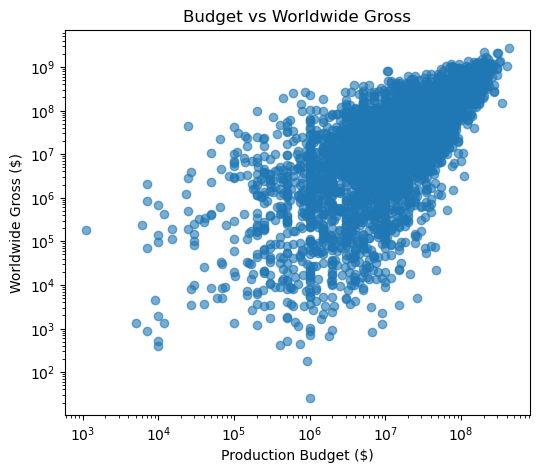

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(tn_clean['production_budget'], tn_clean['worldwide_gross'], alpha=0.6)
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.xscale('log')
plt.yscale('log')
plt.show()

This scatter plot shows the relationship between a movie’s **production budget** and its **worldwide gross revenue**.  
Both axes use a logarithmic scale to handle the wide financial range.    
A positive trend is visible, higher budgets generally correlate with higher global earnings, although some **low-budget films** achieved strong revenues (profitable outliers), and a few **high-budget films** underperformed.      
This confirms that while bigger investments often yield higher returns, success is not guaranteed.   

In [29]:
#1: How do different genres perform according to ratings?
# IMDB Data

imdb_merged = pd.read_sql("SELECT * FROM imdb_merged;", conn)
print("IMDb data loaded successfully.")
display(imdb_merged.head())

imdb_merged[['primary_title', 'genres', 'averagerating', 'numvotes']].info()
print("\nMissing values:\n", imdb_merged[['genres', 'averagerating']].isna().sum())

IMDb data loaded successfully.


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
3,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
4,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35090 entries, 0 to 35089
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  35090 non-null  object 
 1   genres         35090 non-null  object 
 2   averagerating  35090 non-null  float64
 3   numvotes       35090 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB

Missing values:
 genres           0
averagerating    0
dtype: int64


In [30]:
# Duplicate dataframe and split multi-genre entries
imdb_genre = imdb_merged.copy()
imdb_genre['genre_split'] = imdb_genre['genres'].str.split(',')

# Explode genres (so one genre per row)
imdb_genre = imdb_genre.explode('genre_split')

# Compute average, median, and count of ratings per genre
genre_ratings = (
    imdb_genre.groupby('genre_split', as_index=False)
    .agg(
        avg_rating=('averagerating', 'mean'),
        median_rating=('averagerating', 'median'),
        total_votes=('numvotes', 'sum'),
        movie_count=('primary_title', 'count')
    )
    .sort_values(by='avg_rating', ascending=False)
)

# Display results
print("Average rating by genre calculated successfully.")
display(genre_ratings.head(10))

Average rating by genre calculated successfully.


,genre_split,avg_rating,median_rating,total_votes,movie_count
17,News,7.228736,7.30,116851,174
7,Documentary,7.150255,7.20,4524598,5096
4,Biography,6.940584,7.00,21569881,1747
14,Music,6.809797,7.00,5432275,888
12,History,6.747377,6.90,7811952,1239
21,Sport,6.704412,6.80,3741684,612
23,War,6.327557,6.60,2677149,479
3,Animation,6.299130,6.50,15336144,1034
15,Musical,6.252244,6.35,1379367,312
8,Drama,6.202381,6.30,119223352,16592


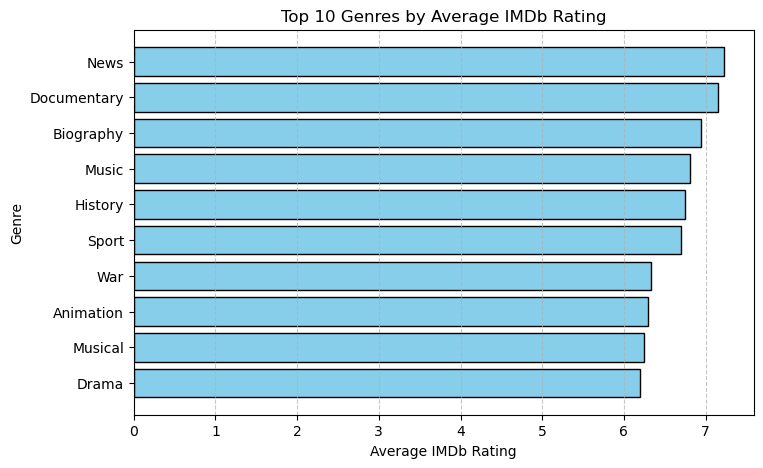

In [31]:
# Select top 10 genres
top_genres = genre_ratings.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_genres['genre_split'], top_genres['avg_rating'], color='skyblue', edgecolor='black')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average IMDb Rating')
plt.gca().invert_yaxis()  # Highest-rated genre appears at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows the top 10 movie genres ranked by their average IMDb ratings.  
Genres with higher bars indicate stronger audience appreciation and overall satisfaction.  
The results highlight which genres consistently receive better reception from viewers, 
providing valuable insights for production companies when prioritizing future projects.

In [32]:
# 2: Profitability by Genre
# Merge IMDb + The Numbers

# Select and rename relevant columns
imdb_fin = imdb_merged[['primary_title', 'genres']].copy()
tn_fin = tn_clean[['movie', 'production_budget', 'worldwide_gross', 'profit', 'roi']].copy()

# Create normalized titles for merging
imdb_fin['title_clean'] = imdb_fin['primary_title'].str.lower().str.replace('[^a-z0-9 ]', '', regex=True).str.strip()
tn_fin['title_clean'] = tn_fin['movie'].str.lower().str.replace('[^a-z0-9 ]', '', regex=True).str.strip()

# Merge datasets
merged_fin = pd.merge(imdb_fin, tn_fin, on='title_clean', how='inner')

print(f"Merged IMDb + The Numbers: {merged_fin.shape[0]} records")
display(merged_fin.head())

Merged IMDb + The Numbers: 2487 records


,primary_title,genres,title_clean,movie,production_budget,worldwide_gross,profit,roi
0,Foodfight!,"Action,Animation,Comedy",foodfight,Foodfight!,45000000.0,7.370600e+04,-4.492629e+07,-1.00
1,On the Road,"Adventure,Drama,Romance",on the road,On the Road,25000000.0,9.313302e+06,-1.568670e+07,-0.63
2,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",the secret life of walter mitty,The Secret Life of Walter Mitty,91000000.0,1.878612e+08,9.686118e+07,1.06
3,A Walk Among the Tombstones,"Action,Crime,Drama",a walk among the tombstones,A Walk Among the Tombstones,28000000.0,6.210859e+07,3.410859e+07,1.22
4,Jurassic World,"Action,Adventure,Sci-Fi",jurassic world,Jurassic World,215000000.0,1.648855e+09,1.433855e+09,6.67


In [33]:
# Split multi-genre entries
merged_fin['genre_split'] = merged_fin['genres'].str.split(',')

# Explode so each genre is on its own row
merged_fin_exploded = merged_fin.explode('genre_split')

# Group by genre and compute profitability metrics
genre_profitability = (
    merged_fin_exploded.groupby('genre_split', as_index=False)
    .agg(
        avg_roi=('roi', 'mean'),
        median_roi=('roi', 'median'),
        avg_profit=('profit', 'mean'),
        movie_count=('primary_title', 'count')
    )
    .sort_values(by='avg_roi', ascending=False)
)

print("Profitability by genre calculated successfully.")
display(genre_profitability.head(10))


Profitability by genre calculated successfully.


,genre_split,avg_roi,median_roi,avg_profit,movie_count
11,Horror,9.577190,1.675,5.037620e+07,329
14,Mystery,7.773172,1.695,6.140089e+07,206
19,Thriller,5.744559,1.020,6.851235e+07,457
6,Documentary,5.490899,0.480,3.178078e+07,100
3,Biography,4.394536,0.750,5.080196e+07,191
18,Sport,4.042642,0.440,4.959736e+07,56
8,Family,3.589370,1.030,1.194623e+08,137
9,Fantasy,3.460000,1.175,1.507945e+08,175
2,Animation,3.343906,1.775,2.347722e+08,133
13,Musical,3.135000,-0.350,1.464679e+08,17


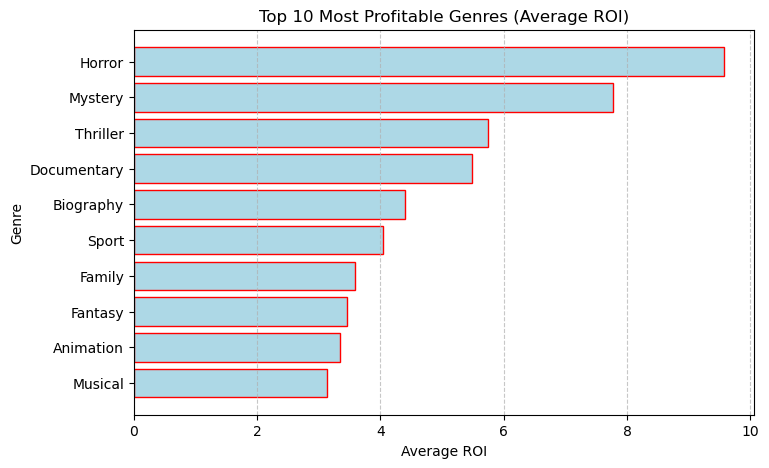

In [34]:
plt.figure(figsize=(8,5))
top_profit_genres = genre_profitability.head(10)
plt.barh(top_profit_genres['genre_split'], top_profit_genres['avg_roi'], color='lightblue', edgecolor='red')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Top 10 Most Profitable Genres (Average ROI)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The chart summarizes profitability (ROI and profit) by movie genre.  
Genres such as **Horror**, **Mystery**, and **Thriller** exhibit the highest ROI values,  
indicating strong financial efficiency despite relatively lower budgets.  
In contrast, genres like **Animation** and **Fantasy** yield large total profits but moderate ROI,  
reflecting higher production costs offset by global box office success.  
These insights highlight how budget scale and genre type jointly influence film profitability.

In [35]:
# 3: Relationship Between Production Budget and Box Office Revenue
# The Numbers dataset

tn_clean[['production_budget', 'worldwide_gross', 'roi']].describe()

,production_budget,worldwide_gross,roi
count,5.782000e+03,5.415000e+03,5415.000000
mean,3.158776e+07,9.768800e+07,4.125453
std,4.181208e+07,1.788591e+08,30.487388
min,1.100000e+03,2.600000e+01,-1.000000
25%,5.000000e+06,7.004834e+06,-0.300000
50%,1.700000e+07,3.333987e+07,0.880000
75%,4.000000e+07,1.044590e+08,2.970000
max,4.250000e+08,2.776345e+09,1799.000000


In [36]:
# Correlation: Budget vs Worldwide Gross

corr_value = tn_clean['production_budget'].corr(tn_clean['worldwide_gross'])
print(f"Correlation between Production Budget and Worldwide Gross: {corr_value:.2f}")

Correlation between Production Budget and Worldwide Gross: 0.75


In [37]:
# Clean numeric data before correlation/regression

tn_corr = tn_clean[['production_budget', 'worldwide_gross']].dropna()
tn_corr = tn_corr[(tn_corr['production_budget'] > 0) & (tn_corr['worldwide_gross'] > 0)]

Correlation between Production Budget and Worldwide Gross: 0.75


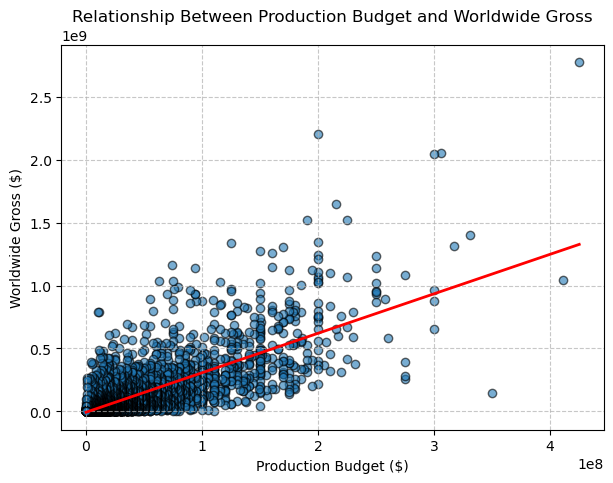

In [38]:
# Correlation + Scatter

corr_value = tn_corr['production_budget'].corr(tn_corr['worldwide_gross'])
print(f"Correlation between Production Budget and Worldwide Gross: {corr_value:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(tn_corr['production_budget'], tn_corr['worldwide_gross'], alpha=0.6, edgecolor='black')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Relationship Between Production Budget and Worldwide Gross')
plt.grid(True, linestyle='--', alpha=0.7)

m, b = np.polyfit(tn_corr['production_budget'], tn_corr['worldwide_gross'], 1)
plt.plot(tn_corr['production_budget'], m*tn_corr['production_budget'] + b, color='red', linewidth=2)
plt.show()

The scatter plot and correlation coefficient (**r = 0.75**) reveal a strong positive relationship between production budgets and worldwide gross revenue.  
This indicates that, in general, higher-budget films tend to generate greater global earnings.  
However, the wide spread of data points highlights that not all expensive movies achieve proportional success,  suggesting diminishing returns and the influence of non-budget factors such as marketing, release timing and genre appeal.

## Recommendations

1. **Invest in proven genres:**  
   Analysis shows that genres like *Horror*, *Thriller*, and *Adventure* deliver strong returns on investment (ROI) relative to their budgets.  
   Studios can balance risk by allocating moderate budgets to these genres, which tend to have consistent audience engagement and profitability.

2. **Optimize budget allocation:**  
   The strong correlation (r = 0.75) between production budget and worldwide gross indicates that higher budgets generally lead to higher revenue.  
   However, the relationship is not perfectly linear — after a certain point, spending more yields diminishing returns.  
   Studios should perform budget sensitivity analyses before green-lighting major projects.

3. **Focus on quality and audience retention:**  
   From IMDb ratings, genres such as *Drama* and *Biography* receive high critical appreciation but moderate profits.  
   This suggests that narrative quality can drive reputation and long-term studio value even if short-term ROI is modest.


## Conclusion
This analysis combined insights from IMDb, Box Office Mojo, and The Numbers to evaluate how film genre, audience ratings and production budgets influence commercial success. Results indicate that audience-favored genres such as *Drama* and *Biography* sustain critical strength, while cost-efficient categories like *Horror* and *Thriller* deliver the highest profitability. A strong positive correlation (r = 0.75) between production budget and worldwide gross further confirms that financial investment generally enhances box-office returns, albeit with diminishing efficiency at higher scales. Overall, these findings underscore the importance of strategic budget allocation, data-driven genre selection and balanced portfolio planning to maximize both creative impact and financial performance in the film industry.